# What is Web Scraping?

- Web scraping is an automatic method to obtain large amounts of data from websites. 
- Most of this data is unstructured data in an HTML format which is then converted into structured data in a spreadsheet or a database so that it can be used in various applications. 
- There are many different ways to perform web scraping to obtain data from websites.
- These include using online services, particular API’s or even creating your code for web scraping from scratch. 
- Many large websites, like Google, Twitter, Facebook, StackOverflow, etc. have API’s that allow you to access their data in a structured format. This is the best option.
- But there are other sites that don’t allow users to access large amounts of data in a structured form or they are simply not that technologically advanced. 

- In that situation, it’s best to use Web Scraping to scrape the website for data.


# Why Web Scraping?

- Suppose we want some information from a website? Let’s say a paragraph on Donald Trump! What do you do? Well, we can copy and paste the information from Wikipedia to your own file. But what if we want to get large amounts of information from a website as quickly as possible? Such as large amounts of data from a website to train a Machine Learning algorithm? In such a situation, copying and pasting will not work! And that’s when we’ll need to use Web Scraping. 


# Why is Python a popular programming language for Web Scraping?

- It is the most popular language for web scraping as it can handle most of the processes easily. 
- It also has a variety of libraries that were created specifically for Web Scraping. 
- **Scrapy** is a very popular open-source web crawling framework that is written in Python. It is ideal for web scraping as well as extracting data using APIs. 
- **Beautiful soup** is another Python library that is highly suitable for Web Scraping. It creates a parse tree that can be used to extract data from HTML on a website. Beautiful soup also has multiple features for navigation, searching, and modifying these parse trees.


## Agenda of this Notebook

- We will see demo of web scraping using Python Library Beautiful Soup.
- The website we will be performing scraping is https://www.ambitionbox.com/list-of-companies?page=1.
- This website provide information about companies such Company Name, Type, Head Quarter, Location, How old it is and many more.
- This is going to be very quick demo for web scraping, we will be using few methods of Beautiful Soup lib to scrap data from above website. Beautiful Soup has lots of methods and functions to perform web scraping but coding depends on what type of website we are scraping. We will see how we can scrap compnay data with this lib.

#### This is how website looks when we visit to the website:

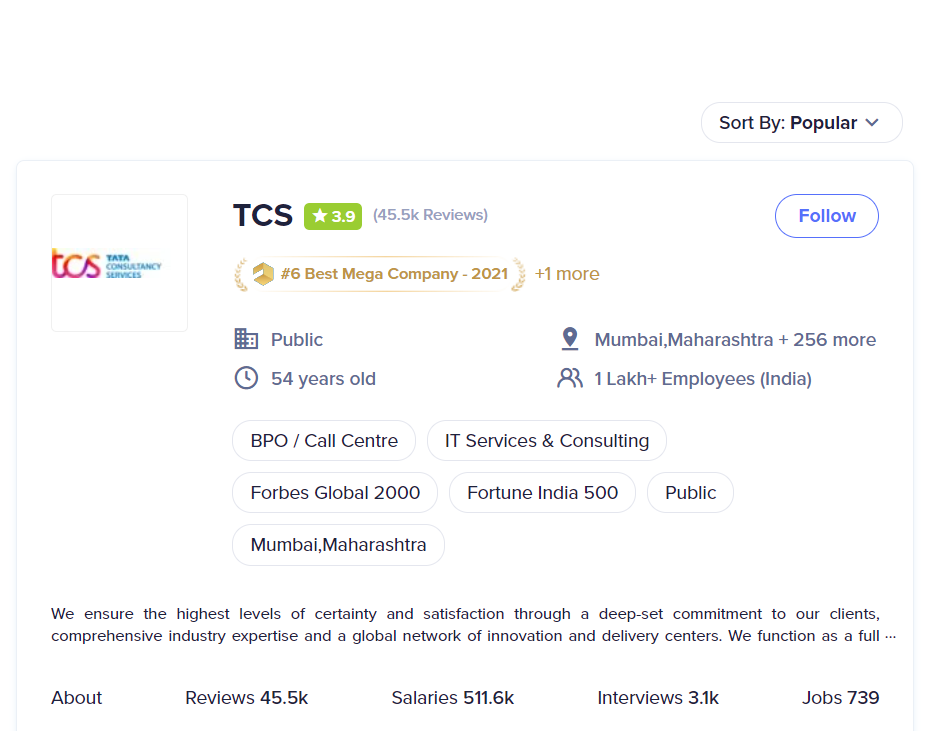

- After opening the website in a browser.
- Do right click and go to inspect.
- A new pop up window will open in right side of screen, there go and select cursor on top left to select an element in the page to inspect it.
- After selecting that curosr, put that curosr over any element on page, which you are looking for and on right side you will notice the particular tag or division where data is residing.
- With the help of this, we come to know in which tag of HTML our data which we are looking for and what is the class name.
- HTML tag and Class name is very useful while performing web scraping, because when we feth complete text of website, nothing but HTML source page will only come to us.
- And to find our desired data from that mess, we should know in which tag our data is residing.

##### Note: Basic HTML knowledge is must for web scraping.

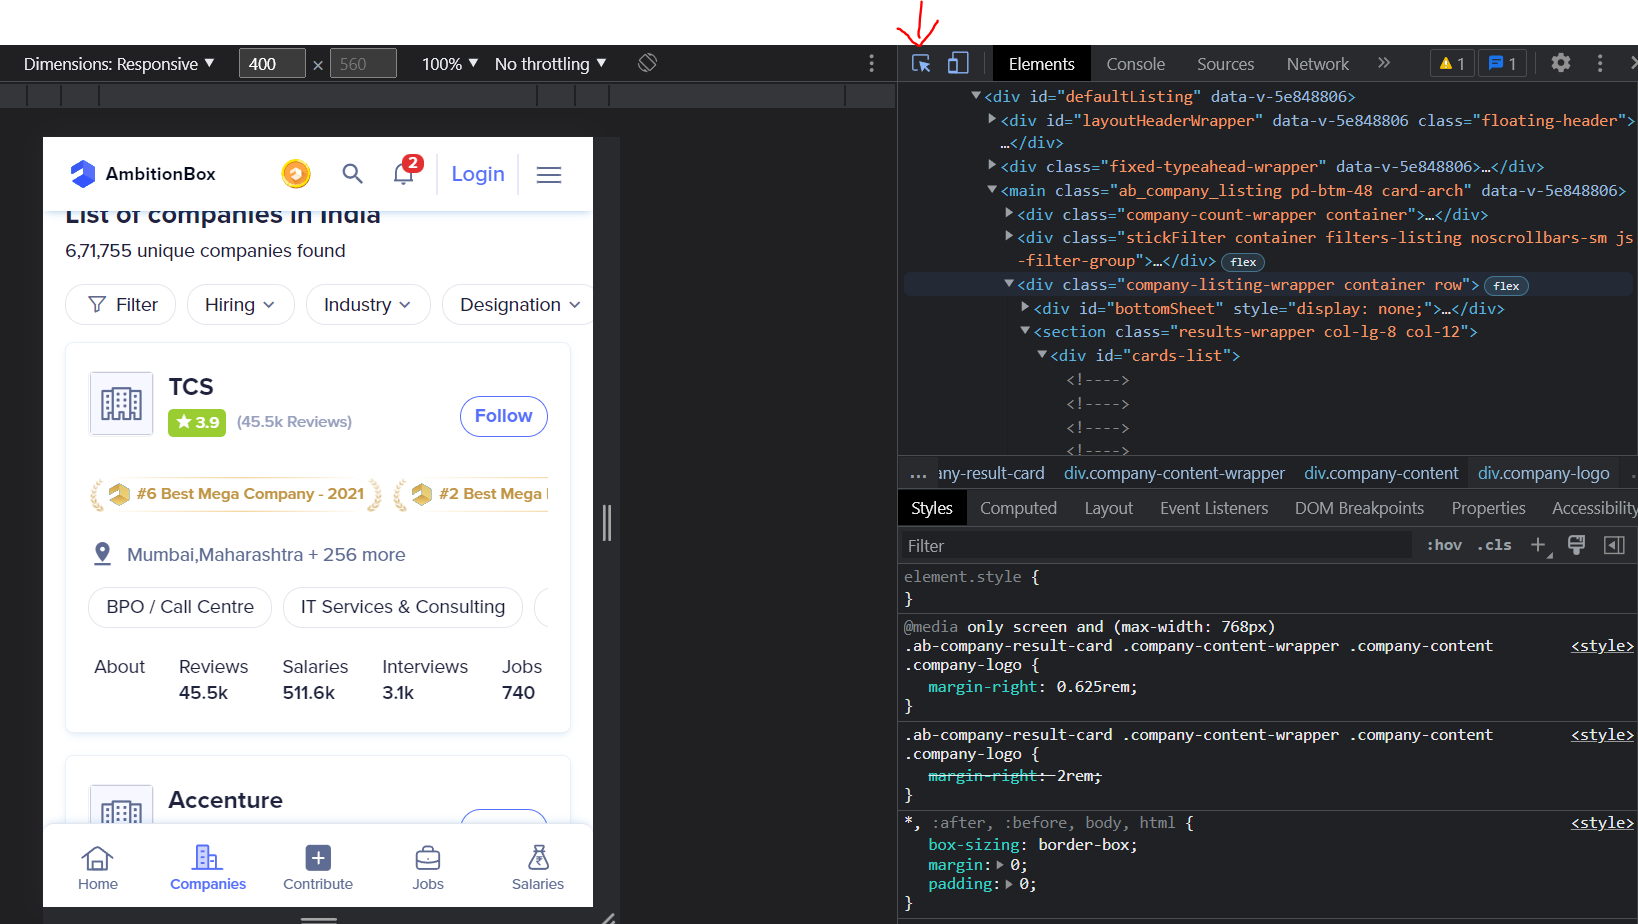

In [2]:
import pandas as  pd
import requests
from bs4 import BeautifulSoup

In [9]:
website_url = "https://www.ambitionbox.com/list-of-companies?page=1"
requests.get(website_url)

<Response [200]>

- Here website response is 200, which means connection is successfull.
- Sometime few websites give Access Denied error because website think that some bot is trying to acess its data, for that we need to pass header which will tell website that a human being is trying to connect with website with the help of a browser.

#### if response code is 403

- headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}

In [10]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}

In [11]:
requests.get('https://www.ambitionbox.com/list-of-companies?page=1', headers=headers)

<Response [200]>

- Now, when our response is okay.
- We will scrap the website data and store in a variable called webpage.

In [12]:
webpage  = requests.get('https://www.ambitionbox.com/list-of-companies?page=1', headers=headers).text

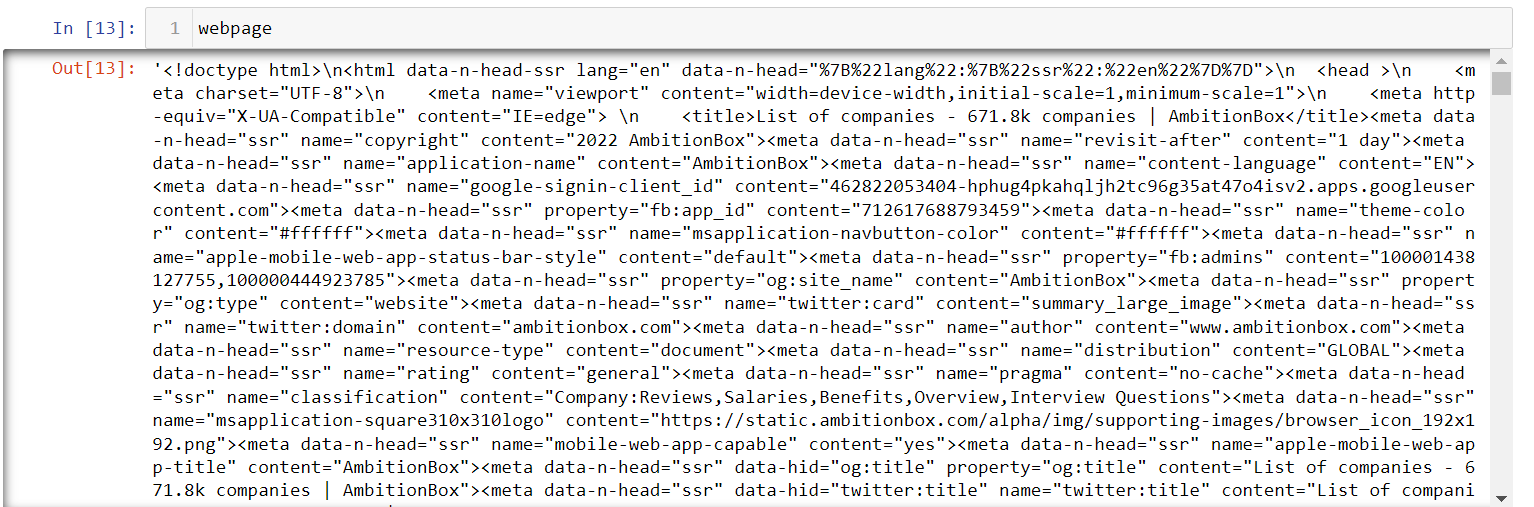

##### This is how raw data looks like, which we have stored in variable called webpage. This data is nothing but HTML source code of website.

- We need one HTML Parser, so installing that.

In [22]:
# To insstall lxml HTML Parser
!pip install lxml

#### We will now use Beautifulsoup and HTML Parser and create an object of Beautifulsoup so that we can use all the methods of Beautifulsoup class. 

- Beautifulsoup has a prettify method which remove unnecessary things from raw data and give you clean HTML source code.

In [14]:
soup = BeautifulSoup(webpage,  "html.parser")

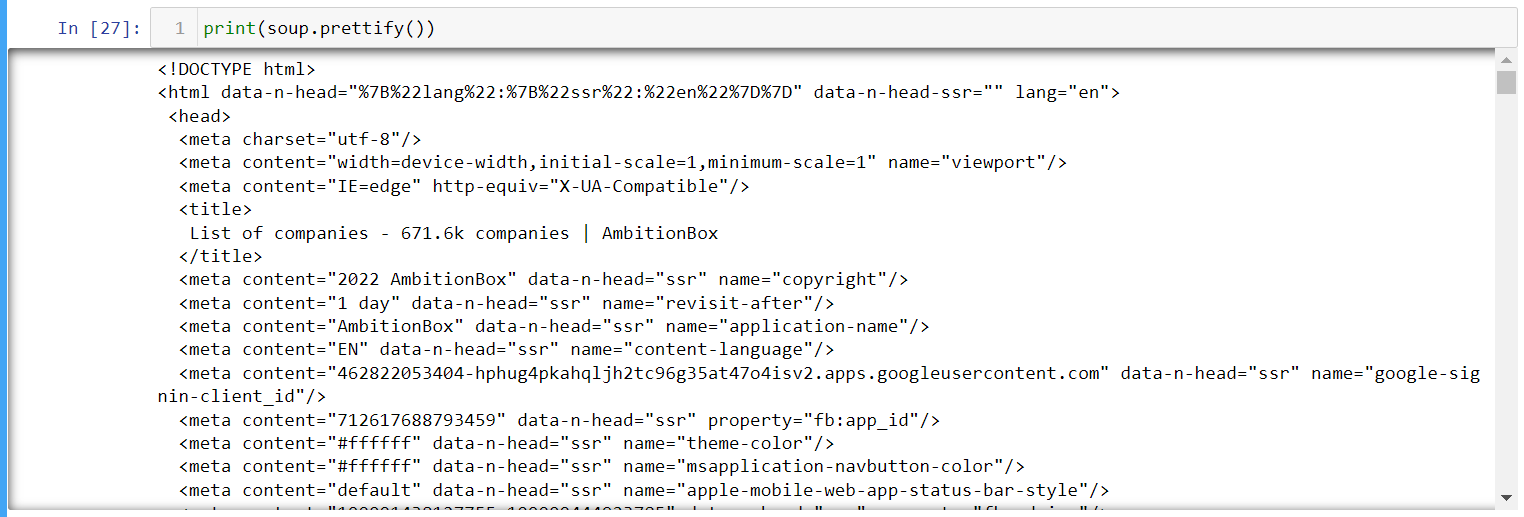

- This is how raw data looks after using prettify method of Beautifulsoup.

#### Now What:

- From inspect method of browser, we will find all tag and class of our desired data which we are looking for.
- And then by uing find() or find_all() method of Beautifuloup, we will be pulling only that part of HTML code.

- Below, I will first show you people how to scrap data by using find() or find_all() method.

In [15]:
soup.find_all('h1')[0].text

'List of companies in India'

In [31]:
for i in soup.find_all('h2'):
    print(i.text.strip())

TCS
Accenture
Cognizant
ICICI Bank
Wipro
HDFC Bank
Capgemini
HCL Technologies
Infosys
Tech Mahindra
Genpact
Axis Bank
IBM
Amazon
Concentrix Corpo...
Larsen & Toubro ...
Reliance jio
Vodafone Idea
HDB Financial Se...
Teleperformance
Kotak Mahindra B...
Reliance Industr...
Bharti Airtel
Deloitte
Tata Motors
Reliance Retail
Mahindra & Mahin...
WNS
IndusInd Bank
DXC Technology


In [32]:
for i in soup.find_all('p'):
    print(i.text.strip())

AmbitionBox
Discover Best Places to Work!
Company reviews. Salaries. Interviews. Jobs.
About Company
6,71,611 unique
			companies found
Sort By:
Popular
3.9
#6 Best Mega Company - 2021
Public
Mumbai,Maharashtra + 255 more
54 years old
1 Lakh+ Employees (India)
We ensure the highest levels of certainty and satisfaction through a deep-set commitment to our clients, comprehensive industry expertise and a global network of innovation and delivery centers.

We function as a full stakeholder to business, offering a consulting-led approach with an integrated portfolio of technology led solutions that encompass the entire Enterprise value chain. Our Customer-centric Engagement Model defines how we do engage with you, offering specialized services and solutions that meet the distinct needs of your business.

We build bespoke teams around your domain and technology requirements drawn from our talent pool of over 488,649 global professionals including 36.5% women from 154 nationalities. Our domai

In [33]:
## sometime when tag is not enough to reach to the right data, then we have to use class name also.

for i in soup.find_all('p', class_='rating'):
    print(i.text.strip())

3.9
4.2
4.0
4.0
3.9
4.0
3.9
3.9
4.0
3.8
4.0
3.9
4.2
4.2
4.1
4.1
4.0
4.3
4.0
3.6
3.9
4.1
4.1
4.1
4.1
4.1
4.1
3.7
3.8
3.9


In [37]:
for i in soup.find_all('a', class_='review-count'):
    print(i.text.strip())

(45.5k Reviews)
(29.8k Reviews)
(27k Reviews)
(34k Reviews)
(25.4k Reviews)
(36.7k Reviews)
(22k Reviews)
(21.5k Reviews)
(25.7k Reviews)
(19.9k Reviews)
(17.9k Reviews)
(17.7k Reviews)
(14.7k Reviews)
(14.9k Reviews)
(14.2k Reviews)
(20.1k Reviews)
(13.7k Reviews)
(13.2k Reviews)
(12.4k Reviews)
(10.1k Reviews)
(12.9k Reviews)
(39.2k Reviews)
(12.1k Reviews)
(8.7k Reviews)
(8.5k Reviews)
(13.5k Reviews)
(19.9k Reviews)
(6.5k Reviews)
(6.4k Reviews)
(6.6k Reviews)


- Above are some example, that how we can scrap data using HTML tag and Class.

- Now by inspecting, I come to know that in div tag and class = 'company-content-wrapper' all company details are there.
- When we do soup.find_all('div', class_='company-content-wrapper'), we get div of data that has conatined all div of each single company of that page. And then we will iterate through that data and by using tag and classes, we will find data which we are looking for.


- [[Company1], [Company2], .....]  like this. we will use for loop and one by one go to the div of every compnay and extract data.


- Data which we are looking for are:
 - Name of Company
 - Rating
 - Reviews
 - Company Type
 - Head Quarter
 - Old
 - Number of Employees

In [16]:
company = soup.find_all('div', class_='company-content-wrapper')

In [22]:
name=[]
rating=[]
reviews=[]
ctype=[]
hq=[]
how_old=[]
no_of_employee=[]

for i in company:

  name.append(i.find('h2').text.strip())
  rating.append(i.find('p',class_='rating').text.strip())
  reviews.append(i.find('a' , class_='review-count').text.strip())
  ctype.append(i.find_all('p',class_='infoEntity')[0].text.strip())
  hq.append(i.find_all('p',class_='infoEntity')[1].text.strip())
  how_old.append(i.find_all('p',class_='infoEntity')[2].text.strip())
  no_of_employee.append(i.find_all('p',class_='infoEntity')[3].text.strip())


## Creating a dictionary with column name and data values
data_dict = {'name':name,
   'rating':rating,
   'reviews':reviews,
   'company_type':ctype,
   'Head_Quarters':hq,
   'Company_Age':how_old,
   'No_of_Employee':no_of_employee,
   }

## Creating Data Frame using pandas

df=pd.DataFrame(data_dict)

In [49]:
df.head()

,name,rating,reviews,company_type,Head_Quarters,Company_Age,No_of_Employee
0,TCS,3.9,(45.5k Reviews),Public,"Mumbai,Maharashtra + 255 more",54 years old,1 Lakh+ Employees (India)
1,Accenture,4.2,(29.8k Reviews),Public,Dublin + 137 more,33 years old,1 Lakh+ Employees (India)
2,Cognizant,4.0,(27k Reviews),Private,Teaneck. New Jersey. + 89 more,28 years old,1 Lakh+ Employees (India)
3,ICICI Bank,4.0,(34k Reviews),Public,"Mumbai,Maharashtra + 1023 more",28 years old,50k-1 Lakh Employees (India)
4,Wipro,3.9,(25.4k Reviews),Public,"Bangalore/Bengaluru,Karnataka + 261 more",77 years old,1 Lakh+ Employees (India)


#### This is how we get data after creating Data Frame form the scrap data.

In [23]:
website_url

'https://www.ambitionbox.com/list-of-companies?page=1'

## Now performing scraping for all pages and creating dataframe for all the pages

- Till now for demo purpose, we have only scrapped a single page of that website.
- https://www.ambitionbox.com/list-of-companies?page=1
- We will use for loop and can go to as many number of pages as we want.

- Here, I will be going till page number 300.


In [24]:
import numpy as np

# An empty Data Frame
company_scrap_data=pd.DataFrame()

for j in range(1,301):
    # Scraping website and storing raw data
    webpage=requests.get('https://www.ambitionbox.com/list-of-companies?page={}'.format(j)).text
    # BeautifulSoup object
    soup=BeautifulSoup(webpage,'html.parser')
    # All company div
    company=soup.find_all('div',class_='company-content-wrapper')
    # Declaring empty list for data 
    name=[]
    rating=[]
    reviews=[]
    ctype=[]
    hq=[]
    how_old=[]
    no_of_employee=[]

    for i in company:
        try:
            name.append(i.find('h2').text.strip())
        except:
            name.append(np.nan)

        try:
            rating.append(i.find('p',class_='rating').text.strip())
        except:
            rating.append(np.nan)

        try:
            reviews.append(i.find('a' , class_='review-count').text.strip())
        except:
            reviews.append(np.nan)

        try:
            ctype.append(i.find_all('p',class_='infoEntity')[0].text.strip())
        except:
            ctype.append(np.nan)
            
        try:
            hq.append(i.find_all('p',class_='infoEntity')[1].text.strip())
        except:
            hq.append(np.nan)

        try:
            how_old.append(i.find_all('p',class_='infoEntity')[2].text.strip())
        except:
            how_old.append(np.nan)
            
        try:
            no_of_employee.append(i.find_all('p',class_='infoEntity')[3].text.strip())
        except:
            no_of_employee.append(np.nan)

        data_dict = {'name':name,
                     'rating':rating,
                     'reviews':reviews,
                     'company_type':ctype,
                     'Head_Quarters':hq,
                     'Company_Age':how_old,
                     'No_of_Employee':no_of_employee}
        
        df=pd.DataFrame(data_dict)
        
        # Appending all data frame df into main a single data frame
        company_scrap_data=company_scrap_data.append(df,ignore_index=True)

In [25]:
company_scrap_data.shape

(139440, 7)

In [26]:
company_scrap_data.sample(5)

,name,rating,reviews,company_type,Head_Quarters,Company_Age,No_of_Employee
104397,M Tech Innovatio...,3.2,(74 Reviews),Private,"Pune,Maharashtra + 5 more",30 years old,201-500 Employees (India)
112301,Tirupati Group,4.2,(68 Reviews),Public,"Sirmour,Himachal Pradesh + 6 more",17 years old,51-200 Employees (India)
45156,Vision Express,4.1,(169 Reviews),Private,"Bangalore/Bengaluru,Karnataka + 27 more",14 years old,501-1k Employees (India)
20970,Westin,4.0,(356 Reviews),Private,"Kolkata,West Bengal + 26 more",92 years old,5k-10k Employees (India)
132151,Rana Sugars,4.2,(57 Reviews),Public,Chandigarh + 11 more,30 years old,1k-5k Employees (India)


###### ------------------THE END-----------------------------------------------------------------------------------